# <center>JustForYou Data Analysis Challenge<center>

In [1]:
# Algumas importações básicas necessárias

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import dataframe_image as dfi
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from lightgbm import LGBMRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

## Leitura do arquivo contendo os dados

In [2]:
# Lendo os dados e salvando no dataframe df

df = pd.read_csv('Dados.csv')

## Algumas observações inicias

In [3]:
# Tamanho do dataset

df.shape

(5000, 5)

In [4]:
# Observando as 5 primeiras linhas

df.head()

,id,hair_type,age,created,value
0,2d3f90ca-e262-4b32-8b57-80fb0170bf5a,ondulado,20,2022-01-05 00:00:00+00,70.33
1,3cb90d19-02a1-43f3-a36f-b421e41b3d2f,ondulado,30,2022-01-05 00:27:32.980132+00,51.44
2,1cd08ffd-4e85-4f1d-bdc1-afb292b056db,cacheado,38,2022-01-05 00:55:05.960265+00,56.83
3,d518ff19-df6a-445f-a13c-8b45b2addd7b,cacheado,20,2022-01-05 01:22:38.940397+00,91.51
4,c2baa4bc-9fe3-4cfe-809f-c52a728fa5bb,ondulado,29,2022-01-05 01:50:11.92053+00,54.35


In [5]:
# Verificando que não existem dados ausentes

df.isnull().sum()

id           0
hair_type    0
age          0
created      0
value        0
dtype: int64

In [6]:
# Tipo de dados existentes

df.dtypes

id            object
hair_type     object
age            int64
created       object
value        float64
dtype: object

In [7]:
# Algumas estatísticas básicas

df.describe()

,age,value
count,5000.00000,5000.000000
mean,33.05000,74.878392
std,9.82226,14.375683
min,15.00000,50.000000
25%,26.00000,62.307500
50%,32.00000,75.005000
75%,39.00000,87.362500
max,75.00000,100.000000


## Extraindo o mês da coluna created

O mês é uma informação importante para o nosso problema uma vez que houve queda nas vendas em março e queremos saber o porquê disso. Portanto, para melhorar nossa análise vamos extrair o mês de compra da coluna created.

Para facilitar vamos mudar o tipo de dado da variável "created" para datetime.

In [8]:
# Modificando o tipo de dado para datetime

df['created'] = pd.to_datetime(df['created'])

In [9]:
# Verificando que deu tudo certo !

df.dtypes

id                        object
hair_type                 object
age                        int64
created      datetime64[ns, UTC]
value                    float64
dtype: object

In [10]:
# Extraindo o mês

meses = []

for created in df['created'] :
    meses.append(created.month)

In [11]:
# Criando uma coluna no df que indica o mês da compra

df['Mês'] = meses

In [12]:
# Observando as 5 primeiras linhas do novo df

df.head()

,id,hair_type,age,created,value,Mês
0,2d3f90ca-e262-4b32-8b57-80fb0170bf5a,ondulado,20,2022-01-05 00:00:00+00:00,70.33,1
1,3cb90d19-02a1-43f3-a36f-b421e41b3d2f,ondulado,30,2022-01-05 00:27:32.980132+00:00,51.44,1
2,1cd08ffd-4e85-4f1d-bdc1-afb292b056db,cacheado,38,2022-01-05 00:55:05.960265+00:00,56.83,1
3,d518ff19-df6a-445f-a13c-8b45b2addd7b,cacheado,20,2022-01-05 01:22:38.940397+00:00,91.51,1
4,c2baa4bc-9fe3-4cfe-809f-c52a728fa5bb,ondulado,29,2022-01-05 01:50:11.920530+00:00,54.35,1


## Faturamento Mensal

É dito que em março houve uma queda de aproximadamente 50 % das vendas. Vamos verificar isso calculando o faturamento em cada mês.

In [13]:
# Calculando o faturamento em cada um dos 4 meses

faturamento_jan = df[df['Mês'] == 1]['value'].sum()
faturamento_fev = df[df['Mês'] == 2]['value'].sum()
faturamento_mar = df[df['Mês'] == 3]['value'].sum()
faturamento_abril = df[df['Mês'] == 4]['value'].sum()

In [14]:
faturamento_jan , faturamento_fev , faturamento_mar, faturamento_abril

(101773.46, 114878.20999999999, 46028.24, 111712.04999999999)

De fato ocorreu uma grande queda nas vendas em março, pois nos outros 3 meses o faturamento ficou entre 100000 e 115000 enquanto em março foi de 46028 .

In [15]:
# Calculando a queda percentual no faturamento de fevereiro para março

queda = ((faturamento_fev - faturamento_mar)/faturamento_fev)*100

In [16]:
print("Ocorreu uma queda de %f por cento nas vendas de fevereiro para março." %queda)

Ocorreu uma queda de 59.933011 por cento nas vendas de fevereiro para março.


Vamos organizar essas informações em um gráfico :

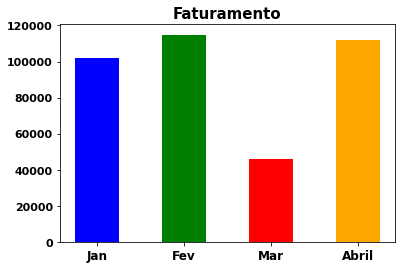

In [17]:
meses = ['Jan' , 'Fev' , 'Mar' , 'Abril']

faturamentos = [faturamento_jan , faturamento_fev , faturamento_mar, faturamento_abril]

cores = ['blue' , 'green' , 'red' , 'orange']

plt.bar(meses, faturamentos , width = 0.5 , color = cores)
plt.xticks(size = 12 , weight = 'black')
plt.yticks(size = 11 , weight = 'black')
plt.title('Faturamento' , size = 15 , weight = 'black')
plt.savefig('Faturamento Mensal.jpg')

## Será que a quantidade de vendas também foi menor em março ?
## Isso pode ajudar a explicar a queda de faturamento ?

Vamos descobrir o número total de vendas em cada mês :

In [18]:
qtd_vendas_jan = (df['Mês'] == 1).sum()
qtd_vendas_fev = (df['Mês'] == 2).sum()
qtd_vendas_mar = (df['Mês'] == 3).sum()
qtd_vendas_abril = (df['Mês'] == 4).sum()

In [19]:
qtd_vendas = [qtd_vendas_jan , qtd_vendas_fev , qtd_vendas_mar , qtd_vendas_abril]

In [20]:
qtd_vendas

[1360, 1540, 610, 1490]

De fato o número de vendas foi muito menor em março ! Em todos os outros 3 meses o número de vendas foi maior que o dobro do número de vendas de março !

Novamente vamos organizar nossas informações em um gráfico :

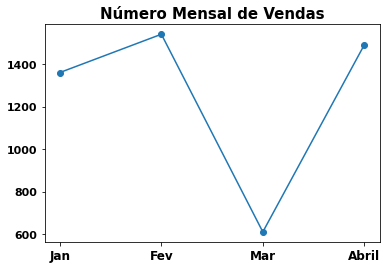

In [21]:
plt.plot(meses , qtd_vendas, '-o')
plt.title('Número Mensal de Vendas' , size = 15 , weight = 'black')
plt.xticks(size = 12 , weight = 'black')
plt.yticks(size = 11 , weight = 'black')
plt.savefig('Número Mensal de Vendas.jpg')

## Por que o número de vendas caiu tanto em março ?
## Essa queda ocorreu para um tipo específico de produto ou foi geral ?

O objetivo aqui é investigar se houve queda acentuada nas vendas de um tipo de produto (liso, ondulado, cacheado, crespo) ou se a queda ocorreu para todos.

In [22]:
# Calculando o número de vendas de cada tipo de produto em cada mês

qtd_vendas_liso_jan = ((df['Mês'] == 1) & (df['hair_type'] == 'liso')).sum()
qtd_vendas_liso_fev = ((df['Mês'] == 2) & (df['hair_type'] == 'liso')).sum()
qtd_vendas_liso_mar = ((df['Mês'] == 3) & (df['hair_type'] == 'liso')).sum()
qtd_vendas_liso_abril = ((df['Mês'] == 4) & (df['hair_type'] == 'liso')).sum()

qtd_vendas_ondulado_jan = ((df['Mês'] == 1) & (df['hair_type'] == 'ondulado')).sum()
qtd_vendas_ondulado_fev = ((df['Mês'] == 2) & (df['hair_type'] == 'ondulado')).sum()
qtd_vendas_ondulado_mar = ((df['Mês'] == 3) & (df['hair_type'] == 'ondulado')).sum()
qtd_vendas_ondulado_abril = ((df['Mês'] == 4) & (df['hair_type'] == 'ondulado')).sum()

qtd_vendas_cacheado_jan = ((df['Mês'] == 1) & (df['hair_type'] == 'cacheado')).sum()
qtd_vendas_cacheado_fev = ((df['Mês'] == 2) & (df['hair_type'] == 'cacheado')).sum()
qtd_vendas_cacheado_mar = ((df['Mês'] == 3) & (df['hair_type'] == 'cacheado')).sum()
qtd_vendas_cacheado_abril = ((df['Mês'] == 4) & (df['hair_type'] == 'cacheado')).sum()

qtd_vendas_crespo_jan = ((df['Mês'] == 1) & (df['hair_type'] == 'crespo')).sum()
qtd_vendas_crespo_fev = ((df['Mês'] == 2) & (df['hair_type'] == 'crespo')).sum()
qtd_vendas_crespo_mar = ((df['Mês'] == 3) & (df['hair_type'] == 'crespo')).sum()
qtd_vendas_crespo_abril = ((df['Mês'] == 4) & (df['hair_type'] == 'crespo')).sum()

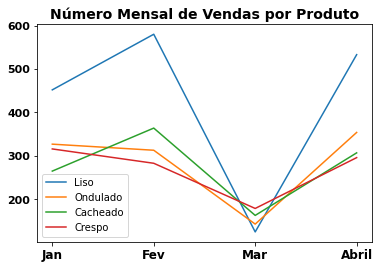

In [23]:
plt.plot(meses, [qtd_vendas_liso_jan , qtd_vendas_liso_fev, qtd_vendas_liso_mar , qtd_vendas_liso_abril], label = 'Liso')
plt.plot(meses, [qtd_vendas_ondulado_jan , qtd_vendas_ondulado_fev, qtd_vendas_ondulado_mar , qtd_vendas_ondulado_abril], label = 'Ondulado')
plt.plot(meses, [qtd_vendas_cacheado_jan , qtd_vendas_cacheado_fev, qtd_vendas_cacheado_mar , qtd_vendas_cacheado_abril] , label = 'Cacheado')
plt.plot(meses, [qtd_vendas_crespo_jan , qtd_vendas_crespo_fev, qtd_vendas_crespo_mar , qtd_vendas_crespo_abril], label = 'Crespo')
plt.title('Número Mensal de Vendas por Produto' , size = 14 , weight = 'black')
plt.legend(loc = 0)
plt.xticks(size = 12 , weight = 'black')
plt.yticks(size = 11 , weight = 'black')
plt.savefig('Número Mensal de Vendas por Produto.jpg')

Podemos perceber que o número de vendas em março caiu para todos os tipos de produto !

A maior queda ocorreu para produtos voltados para cabelo liso. Em todos os demais meses houveram mais de 450 vendas de produtos para cabelo liso enquanto em março ocorreram apenas 125 vendas !

Parece que o faturamento de março foi fortemente afetado pela queda no número de vendas de produtos para cabelo liso !
Vamos investigar a participação que produtos para cabelo liso possuem no faturamento de cada mês :

## Distribuição do Faturamento Mensal por Produto

In [24]:
# Calculando o percentual de participação de cada produto no faturamento de cada mês

per_faturamento_liso_jan = (df[(df['Mês'] == 1) & (df['hair_type'] == 'liso')]['value'].sum())/(faturamento_jan)
per_faturamento_ondulado_jan = (df[(df['Mês'] == 1) & (df['hair_type'] == 'ondulado')]['value'].sum())/(faturamento_jan)
per_faturamento_cacheado_jan = (df[(df['Mês'] == 1) & (df['hair_type'] == 'cacheado')]['value'].sum())/(faturamento_jan)
per_faturamento_crespo_jan = (df[(df['Mês'] == 1) & (df['hair_type'] == 'crespo')]['value'].sum())/(faturamento_jan)

per_faturamento_liso_fev = (df[(df['Mês'] == 2) & (df['hair_type'] == 'liso')]['value'].sum())/(faturamento_fev)
per_faturamento_ondulado_fev = (df[(df['Mês'] == 2) & (df['hair_type'] == 'ondulado')]['value'].sum())/(faturamento_fev)
per_faturamento_cacheado_fev = (df[(df['Mês'] == 2) & (df['hair_type'] == 'cacheado')]['value'].sum())/(faturamento_fev)
per_faturamento_crespo_fev = (df[(df['Mês'] == 2) & (df['hair_type'] == 'crespo')]['value'].sum())/(faturamento_fev)

per_faturamento_liso_mar = (df[(df['Mês'] == 3) & (df['hair_type'] == 'liso')]['value'].sum())/(faturamento_mar)
per_faturamento_ondulado_mar = (df[(df['Mês'] == 3) & (df['hair_type'] == 'ondulado')]['value'].sum())/(faturamento_mar)
per_faturamento_cacheado_mar = (df[(df['Mês'] == 3) & (df['hair_type'] == 'cacheado')]['value'].sum())/(faturamento_mar)
per_faturamento_crespo_mar = (df[(df['Mês'] == 3) & (df['hair_type'] == 'crespo')]['value'].sum())/(faturamento_mar)

per_faturamento_liso_abril = (df[(df['Mês'] == 4) & (df['hair_type'] == 'liso')]['value'].sum())/(faturamento_abril)
per_faturamento_ondulado_abril = (df[(df['Mês'] == 4) & (df['hair_type'] == 'ondulado')]['value'].sum())/(faturamento_abril)
per_faturamento_cacheado_abril = (df[(df['Mês'] == 4) & (df['hair_type'] == 'cacheado')]['value'].sum())/(faturamento_abril)
per_faturamento_crespo_abril = (df[(df['Mês'] == 4) & (df['hair_type'] == 'crespo')]['value'].sum())/(faturamento_abril)

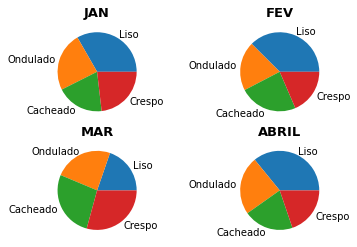

In [25]:
cabelos = ['Liso' , 'Ondulado' , 'Cacheado' , 'Crespo']

plt.subplot(221)
plt.pie([per_faturamento_liso_jan , per_faturamento_ondulado_jan , per_faturamento_cacheado_jan , per_faturamento_crespo_jan] ,
       labels = cabelos , normalize = False)
plt.title('JAN' , size = 13 , weight = 'black')
plt.subplot(222)
plt.pie([per_faturamento_liso_fev , per_faturamento_ondulado_fev , per_faturamento_cacheado_fev , per_faturamento_crespo_fev] ,
       labels = cabelos, normalize = False)
plt.title('FEV' , size = 13 , weight = 'black')
plt.subplot(223)
plt.pie([per_faturamento_liso_mar , per_faturamento_ondulado_mar , per_faturamento_cacheado_mar , per_faturamento_crespo_mar] ,
       labels = cabelos , normalize = False)
plt.title('MAR' , size = 13 , weight = 'black')
plt.subplot(224)
plt.pie([per_faturamento_liso_abril , per_faturamento_ondulado_abril , per_faturamento_cacheado_abril ,
        per_faturamento_crespo_abril] , labels = cabelos, normalize = False)
plt.title('ABRIL' , size = 13 , weight = 'black')
plt.savefig('Participação de cada Tipo de Produto no Faturamento Mensal.jpg')

Como podemos ver no gráfico a cima em Jan, Fev e Abril produtos para cabelo Liso representaram a maior parte do faturamento e, em geral, produtos para cabelos cacheados e crespo representaram a menor parte do faturamento.

Perceba que no mês de março ocorre justamente o contrário : A participação de produtos para cabelo Liso é bem pequena e, além disso, produtos para cabelos crespo e cacheado representaram grande parte do faturamento nesse mês.

Esse é um forte indicativo do porquê das coisas não terem ido tão bem em março.

## Produtos para cabelo Liso são mais caros ?

Houve uma enorme queda na quantidade de vendas de produtos para cabelo liso em março. Sabemos também que produtos para cabelo liso representaram nos outros meses a maior parte do faturamento. Fica então o questionamento : Produtos para cabelo liso são mais caros ?

Vamos calcular o ticket médio de cada produto :

In [26]:
# Calculando

ticket_médio_liso = df[df['hair_type'] == 'liso']['value'].mean()
ticket_médio_ondulado = df[df['hair_type'] == 'ondulado']['value'].mean()
ticket_médio_cacheado = df[df['hair_type'] == 'cacheado']['value'].mean()
ticket_médio_crespo = df[df['hair_type'] == 'crespo']['value'].mean()

In [27]:
tickets = [ticket_médio_liso , ticket_médio_ondulado , ticket_médio_cacheado , ticket_médio_crespo]

ticket_df = pd.DataFrame({'Ticket Médio' : [ticket_médio_liso , ticket_médio_ondulado , ticket_médio_cacheado , ticket_médio_crespo]},
             index = cabelos)
dfi.export(ticket_df, 'Ticket Médio.jpg')
ticket_df

,Ticket Médio
Liso,74.654456
Ondulado,75.137018
Cacheado,74.943913
Crespo,74.889926


Surpreendentemente os tickets médios são todos muito próximos, ou seja, todos os tipos de produto possuem preços muito parecidos !

Logo a influência de produtos para cabelo liso na queda do faturamento de março está muito mais ligada com a grande diminuição no número de vendas desse tipo de produto no mês do que com o seu valor de venda.

## Será que houve um aumento no preço dos produtos  ?

Uma explicação possível para a diminuição do número de vendas em março é ter ocorrido um aumento no preço dos produtos de fevereiro para março. Vamos ver se isso ocorreu :

In [28]:
preço_médio_fev = df[df['Mês'] == 2]['value'].mean()

In [29]:
preço_médio_mar = df[df['Mês'] == 3]['value'].mean()

In [30]:
preço_médio_fev , preço_médio_mar

(74.59624025974031, 75.45613114754093)

Como podemos ver a cima o preço médio dos produtos é praticamente igual tanto em fevereiro como março então provavelmente não ocorreram aumentos de preço de um mês para o outro.

## Qual o público que mais consome os produtos da JustForYou ?

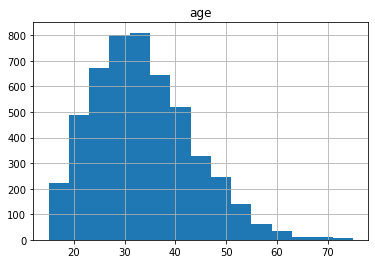

In [31]:
# Observando a distribuição da idade

df[['age']].hist(bins = 15)

plt.savefig('Distribuição da Idade.jpg')

Como podemos observar no histograma a cima a imensa maioria dos clientes da JustForYou são adultos jovens, ou seja, possuem entre 20 e 40 anos. A presença de clientes é maior ainda na faixa que vai de 25 a 35 anos.

Sendo assim faz sentido investir em propagandas para esse público.

## Bônus : Desenvolvendo um modelo que prevê o valor gasto por um cliente

### Tratando a variável categórica hair_type

In [32]:
# Criando variáveis indicadoras de categoria e adicionando elas ao df

df = pd.concat([df , pd.get_dummies(df['hair_type'])] , axis = 1)

In [33]:
# Observando como ficou o df

df.head()

,id,hair_type,age,created,value,Mês,cacheado,crespo,liso,ondulado
0,2d3f90ca-e262-4b32-8b57-80fb0170bf5a,ondulado,20,2022-01-05 00:00:00+00:00,70.33,1,0,0,0,1
1,3cb90d19-02a1-43f3-a36f-b421e41b3d2f,ondulado,30,2022-01-05 00:27:32.980132+00:00,51.44,1,0,0,0,1
2,1cd08ffd-4e85-4f1d-bdc1-afb292b056db,cacheado,38,2022-01-05 00:55:05.960265+00:00,56.83,1,1,0,0,0
3,d518ff19-df6a-445f-a13c-8b45b2addd7b,cacheado,20,2022-01-05 01:22:38.940397+00:00,91.51,1,1,0,0,0
4,c2baa4bc-9fe3-4cfe-809f-c52a728fa5bb,ondulado,29,2022-01-05 01:50:11.920530+00:00,54.35,1,0,0,0,1


### Feature Scaling na variável age

In [34]:
# Instanciando o transformador

SS = StandardScaler()

In [35]:
# Treinando e transformando

df['age'] = SS.fit_transform((np.array(df['age'])).reshape(-1,1))

In [36]:
# Observando novamente como ficou o df

df.head()

,id,hair_type,age,created,value,Mês,cacheado,crespo,liso,ondulado
0,2d3f90ca-e262-4b32-8b57-80fb0170bf5a,ondulado,-1.328748,2022-01-05 00:00:00+00:00,70.33,1,0,0,0,1
1,3cb90d19-02a1-43f3-a36f-b421e41b3d2f,ondulado,-0.310550,2022-01-05 00:27:32.980132+00:00,51.44,1,0,0,0,1
2,1cd08ffd-4e85-4f1d-bdc1-afb292b056db,cacheado,0.504008,2022-01-05 00:55:05.960265+00:00,56.83,1,1,0,0,0
3,d518ff19-df6a-445f-a13c-8b45b2addd7b,cacheado,-1.328748,2022-01-05 01:22:38.940397+00:00,91.51,1,1,0,0,0
4,c2baa4bc-9fe3-4cfe-809f-c52a728fa5bb,ondulado,-0.412370,2022-01-05 01:50:11.920530+00:00,54.35,1,0,0,0,1


### Selecionando as features e a variável alvo

In [37]:
# Features a serem utilizadas pelo modelo

features = ['age' , 'Mês' , 'cacheado' , 'crespo' , 'liso' , 'ondulado']

In [38]:
# Criando a matrix X

X = np.array(df[features])

In [39]:
# Obtendo a variável alvo y

y = np.array(df['value'])

### Validação Cruzada

In [40]:
# Criando uma lista de modelos para depois escolhermos o melhor

modelos = [LinearRegression() , KNeighborsRegressor(), DecisionTreeRegressor() , RandomForestRegressor(),
          GradientBoostingRegressor() , AdaBoostRegressor() , XGBRegressor() , LGBMRegressor(), CatBoostRegressor()]

In [41]:
nome_modelos = ['Linear Regression' , 'K Neighbors Regressor' , 'Decision Tree' , 'Random Forest' , 'Gradient Boosting' ,
               'AdaBoost' , 'XGB' , 'LightGBM' , 'CatBoost']

In [42]:
# Obtendo o score médio de validação cruzada para todos os modelos

score_médio_de_validação = []

for modelo in modelos :
    score_médio_de_validação.append(np.mean(cross_val_score(modelo, X, y, cv = 5, scoring = 'neg_mean_squared_error')))

Learning rate set to 0.050969
0:	learn: 14.4329843	total: 147ms	remaining: 2m 27s
1:	learn: 14.4284620	total: 156ms	remaining: 1m 17s
2:	learn: 14.4256965	total: 167ms	remaining: 55.5s
3:	learn: 14.4186619	total: 173ms	remaining: 43s
4:	learn: 14.4147173	total: 178ms	remaining: 35.5s
5:	learn: 14.4129422	total: 186ms	remaining: 30.8s
6:	learn: 14.4085371	total: 194ms	remaining: 27.5s
7:	learn: 14.4045507	total: 201ms	remaining: 24.9s
8:	learn: 14.4019753	total: 212ms	remaining: 23.4s
9:	learn: 14.3973599	total: 221ms	remaining: 21.9s
10:	learn: 14.3910493	total: 230ms	remaining: 20.7s
11:	learn: 14.3854456	total: 238ms	remaining: 19.6s
12:	learn: 14.3840807	total: 245ms	remaining: 18.6s
13:	learn: 14.3807448	total: 250ms	remaining: 17.6s
14:	learn: 14.3773519	total: 255ms	remaining: 16.7s
15:	learn: 14.3756328	total: 261ms	remaining: 16s
16:	learn: 14.3725753	total: 266ms	remaining: 15.4s
17:	learn: 14.3674986	total: 271ms	remaining: 14.8s
18:	learn: 14.3670432	total: 275ms	remaining: 

176:	learn: 14.1023809	total: 1.21s	remaining: 5.62s
177:	learn: 14.0999897	total: 1.22s	remaining: 5.61s
178:	learn: 14.0973818	total: 1.22s	remaining: 5.61s
179:	learn: 14.0963551	total: 1.23s	remaining: 5.61s
180:	learn: 14.0945386	total: 1.24s	remaining: 5.6s
181:	learn: 14.0909965	total: 1.25s	remaining: 5.6s
182:	learn: 14.0893014	total: 1.25s	remaining: 5.6s
183:	learn: 14.0883595	total: 1.26s	remaining: 5.59s
184:	learn: 14.0865866	total: 1.27s	remaining: 5.59s
185:	learn: 14.0845936	total: 1.27s	remaining: 5.58s
186:	learn: 14.0812268	total: 1.28s	remaining: 5.57s
187:	learn: 14.0794199	total: 1.28s	remaining: 5.55s
188:	learn: 14.0784785	total: 1.29s	remaining: 5.55s
189:	learn: 14.0764250	total: 1.3s	remaining: 5.54s
190:	learn: 14.0763076	total: 1.3s	remaining: 5.52s
191:	learn: 14.0757088	total: 1.31s	remaining: 5.51s
192:	learn: 14.0735657	total: 1.31s	remaining: 5.49s
193:	learn: 14.0722276	total: 1.32s	remaining: 5.48s
194:	learn: 14.0706669	total: 1.32s	remaining: 5.46

347:	learn: 13.8889082	total: 2.21s	remaining: 4.13s
348:	learn: 13.8877612	total: 2.21s	remaining: 4.13s
349:	learn: 13.8861008	total: 2.22s	remaining: 4.12s
350:	learn: 13.8857733	total: 2.23s	remaining: 4.11s
351:	learn: 13.8851172	total: 2.23s	remaining: 4.11s
352:	learn: 13.8842778	total: 2.24s	remaining: 4.1s
353:	learn: 13.8826238	total: 2.25s	remaining: 4.1s
354:	learn: 13.8810549	total: 2.25s	remaining: 4.09s
355:	learn: 13.8805819	total: 2.26s	remaining: 4.08s
356:	learn: 13.8803220	total: 2.27s	remaining: 4.08s
357:	learn: 13.8795079	total: 2.27s	remaining: 4.08s
358:	learn: 13.8789748	total: 2.28s	remaining: 4.07s
359:	learn: 13.8783302	total: 2.28s	remaining: 4.06s
360:	learn: 13.8769308	total: 2.29s	remaining: 4.05s
361:	learn: 13.8764719	total: 2.29s	remaining: 4.04s
362:	learn: 13.8754482	total: 2.3s	remaining: 4.04s
363:	learn: 13.8745646	total: 2.31s	remaining: 4.03s
364:	learn: 13.8737453	total: 2.31s	remaining: 4.02s
365:	learn: 13.8732388	total: 2.31s	remaining: 4.

517:	learn: 13.7522922	total: 3.19s	remaining: 2.97s
518:	learn: 13.7518331	total: 3.2s	remaining: 2.96s
519:	learn: 13.7516248	total: 3.21s	remaining: 2.96s
520:	learn: 13.7506700	total: 3.21s	remaining: 2.96s
521:	learn: 13.7505728	total: 3.22s	remaining: 2.95s
522:	learn: 13.7502923	total: 3.23s	remaining: 2.95s
523:	learn: 13.7497279	total: 3.24s	remaining: 2.94s
524:	learn: 13.7493173	total: 3.25s	remaining: 2.94s
525:	learn: 13.7486867	total: 3.25s	remaining: 2.93s
526:	learn: 13.7480007	total: 3.26s	remaining: 2.92s
527:	learn: 13.7473870	total: 3.26s	remaining: 2.92s
528:	learn: 13.7458052	total: 3.27s	remaining: 2.91s
529:	learn: 13.7456713	total: 3.27s	remaining: 2.9s
530:	learn: 13.7451447	total: 3.28s	remaining: 2.9s
531:	learn: 13.7447372	total: 3.28s	remaining: 2.89s
532:	learn: 13.7442521	total: 3.29s	remaining: 2.88s
533:	learn: 13.7441299	total: 3.3s	remaining: 2.88s
534:	learn: 13.7437709	total: 3.3s	remaining: 2.87s
535:	learn: 13.7420368	total: 3.31s	remaining: 2.86

686:	learn: 13.6570510	total: 4.19s	remaining: 1.91s
687:	learn: 13.6567126	total: 4.2s	remaining: 1.9s
688:	learn: 13.6559823	total: 4.21s	remaining: 1.9s
689:	learn: 13.6555723	total: 4.21s	remaining: 1.89s
690:	learn: 13.6551897	total: 4.22s	remaining: 1.89s
691:	learn: 13.6550897	total: 4.23s	remaining: 1.88s
692:	learn: 13.6550847	total: 4.24s	remaining: 1.88s
693:	learn: 13.6544410	total: 4.24s	remaining: 1.87s
694:	learn: 13.6544235	total: 4.25s	remaining: 1.86s
695:	learn: 13.6536778	total: 4.25s	remaining: 1.86s
696:	learn: 13.6532711	total: 4.26s	remaining: 1.85s
697:	learn: 13.6531013	total: 4.27s	remaining: 1.85s
698:	learn: 13.6528014	total: 4.27s	remaining: 1.84s
699:	learn: 13.6526082	total: 4.28s	remaining: 1.83s
700:	learn: 13.6522641	total: 4.28s	remaining: 1.83s
701:	learn: 13.6521460	total: 4.29s	remaining: 1.82s
702:	learn: 13.6512923	total: 4.29s	remaining: 1.81s
703:	learn: 13.6510758	total: 4.3s	remaining: 1.81s
704:	learn: 13.6509414	total: 4.3s	remaining: 1.8s

858:	learn: 13.5821605	total: 5.19s	remaining: 852ms
859:	learn: 13.5819849	total: 5.2s	remaining: 846ms
860:	learn: 13.5812980	total: 5.21s	remaining: 841ms
861:	learn: 13.5806003	total: 5.22s	remaining: 835ms
862:	learn: 13.5803467	total: 5.22s	remaining: 829ms
863:	learn: 13.5798599	total: 5.23s	remaining: 823ms
864:	learn: 13.5796665	total: 5.24s	remaining: 817ms
865:	learn: 13.5794561	total: 5.24s	remaining: 811ms
866:	learn: 13.5793435	total: 5.25s	remaining: 805ms
867:	learn: 13.5787499	total: 5.25s	remaining: 799ms
868:	learn: 13.5781852	total: 5.26s	remaining: 793ms
869:	learn: 13.5773488	total: 5.27s	remaining: 787ms
870:	learn: 13.5772197	total: 5.27s	remaining: 781ms
871:	learn: 13.5771451	total: 5.28s	remaining: 775ms
872:	learn: 13.5770772	total: 5.28s	remaining: 768ms
873:	learn: 13.5768716	total: 5.29s	remaining: 762ms
874:	learn: 13.5767871	total: 5.29s	remaining: 756ms
875:	learn: 13.5766581	total: 5.3s	remaining: 750ms
876:	learn: 13.5763985	total: 5.3s	remaining: 74

30:	learn: 14.2794906	total: 165ms	remaining: 5.17s
31:	learn: 14.2770906	total: 173ms	remaining: 5.24s
32:	learn: 14.2745322	total: 181ms	remaining: 5.3s
33:	learn: 14.2739619	total: 187ms	remaining: 5.32s
34:	learn: 14.2725907	total: 194ms	remaining: 5.34s
35:	learn: 14.2694841	total: 203ms	remaining: 5.44s
36:	learn: 14.2675020	total: 210ms	remaining: 5.47s
37:	learn: 14.2664084	total: 217ms	remaining: 5.48s
38:	learn: 14.2645912	total: 223ms	remaining: 5.5s
39:	learn: 14.2620566	total: 229ms	remaining: 5.49s
40:	learn: 14.2598642	total: 239ms	remaining: 5.58s
41:	learn: 14.2591801	total: 244ms	remaining: 5.55s
42:	learn: 14.2576880	total: 249ms	remaining: 5.54s
43:	learn: 14.2544156	total: 254ms	remaining: 5.53s
44:	learn: 14.2543469	total: 258ms	remaining: 5.47s
45:	learn: 14.2534944	total: 262ms	remaining: 5.43s
46:	learn: 14.2512846	total: 267ms	remaining: 5.41s
47:	learn: 14.2486599	total: 272ms	remaining: 5.39s
48:	learn: 14.2465345	total: 278ms	remaining: 5.39s
49:	learn: 14.

196:	learn: 14.0302153	total: 1.32s	remaining: 5.37s
197:	learn: 14.0281500	total: 1.33s	remaining: 5.37s
198:	learn: 14.0265359	total: 1.33s	remaining: 5.37s
199:	learn: 14.0244925	total: 1.34s	remaining: 5.36s
200:	learn: 14.0228720	total: 1.35s	remaining: 5.36s
201:	learn: 14.0221123	total: 1.35s	remaining: 5.35s
202:	learn: 14.0209009	total: 1.36s	remaining: 5.35s
203:	learn: 14.0191652	total: 1.37s	remaining: 5.34s
204:	learn: 14.0178564	total: 1.38s	remaining: 5.34s
205:	learn: 14.0151763	total: 1.38s	remaining: 5.32s
206:	learn: 14.0139238	total: 1.39s	remaining: 5.31s
207:	learn: 14.0117621	total: 1.39s	remaining: 5.3s
208:	learn: 14.0093970	total: 1.4s	remaining: 5.29s
209:	learn: 14.0073227	total: 1.4s	remaining: 5.28s
210:	learn: 14.0060035	total: 1.41s	remaining: 5.27s
211:	learn: 14.0039148	total: 1.41s	remaining: 5.25s
212:	learn: 14.0024702	total: 1.42s	remaining: 5.24s
213:	learn: 14.0014889	total: 1.42s	remaining: 5.23s
214:	learn: 14.0004866	total: 1.43s	remaining: 5.

356:	learn: 13.8381565	total: 2.34s	remaining: 4.21s
357:	learn: 13.8379540	total: 2.34s	remaining: 4.2s
358:	learn: 13.8368757	total: 2.35s	remaining: 4.19s
359:	learn: 13.8361399	total: 2.36s	remaining: 4.19s
360:	learn: 13.8356892	total: 2.36s	remaining: 4.18s
361:	learn: 13.8340416	total: 2.37s	remaining: 4.18s
362:	learn: 13.8322667	total: 2.38s	remaining: 4.18s
363:	learn: 13.8309234	total: 2.39s	remaining: 4.17s
364:	learn: 13.8303677	total: 2.4s	remaining: 4.17s
365:	learn: 13.8285392	total: 2.4s	remaining: 4.16s
366:	learn: 13.8275475	total: 2.41s	remaining: 4.15s
367:	learn: 13.8268764	total: 2.41s	remaining: 4.14s
368:	learn: 13.8248731	total: 2.42s	remaining: 4.14s
369:	learn: 13.8242722	total: 2.42s	remaining: 4.13s
370:	learn: 13.8235703	total: 2.43s	remaining: 4.12s
371:	learn: 13.8228442	total: 2.44s	remaining: 4.11s
372:	learn: 13.8208325	total: 2.44s	remaining: 4.1s
373:	learn: 13.8186691	total: 2.45s	remaining: 4.09s
374:	learn: 13.8184425	total: 2.45s	remaining: 4.0

526:	learn: 13.7114082	total: 3.35s	remaining: 3.01s
527:	learn: 13.7113035	total: 3.36s	remaining: 3.01s
528:	learn: 13.7103044	total: 3.37s	remaining: 3s
529:	learn: 13.7102825	total: 3.37s	remaining: 2.99s
530:	learn: 13.7101970	total: 3.38s	remaining: 2.98s
531:	learn: 13.7095100	total: 3.39s	remaining: 2.98s
532:	learn: 13.7087535	total: 3.39s	remaining: 2.97s
533:	learn: 13.7076781	total: 3.4s	remaining: 2.97s
534:	learn: 13.7071453	total: 3.41s	remaining: 2.96s
535:	learn: 13.7070155	total: 3.41s	remaining: 2.96s
536:	learn: 13.7066549	total: 3.42s	remaining: 2.95s
537:	learn: 13.7056336	total: 3.43s	remaining: 2.94s
538:	learn: 13.7056015	total: 3.43s	remaining: 2.94s
539:	learn: 13.7055108	total: 3.44s	remaining: 2.93s
540:	learn: 13.7041728	total: 3.44s	remaining: 2.92s
541:	learn: 13.7035925	total: 3.45s	remaining: 2.91s
542:	learn: 13.7022713	total: 3.45s	remaining: 2.91s
543:	learn: 13.7020786	total: 3.46s	remaining: 2.9s
544:	learn: 13.7015247	total: 3.46s	remaining: 2.89

697:	learn: 13.6245771	total: 4.34s	remaining: 1.88s
698:	learn: 13.6236543	total: 4.35s	remaining: 1.87s
699:	learn: 13.6232955	total: 4.36s	remaining: 1.87s
700:	learn: 13.6232079	total: 4.36s	remaining: 1.86s
701:	learn: 13.6231256	total: 4.37s	remaining: 1.85s
702:	learn: 13.6217927	total: 4.38s	remaining: 1.85s
703:	learn: 13.6213590	total: 4.38s	remaining: 1.84s
704:	learn: 13.6212743	total: 4.39s	remaining: 1.84s
705:	learn: 13.6202681	total: 4.4s	remaining: 1.83s
706:	learn: 13.6200087	total: 4.41s	remaining: 1.82s
707:	learn: 13.6188179	total: 4.41s	remaining: 1.82s
708:	learn: 13.6177267	total: 4.42s	remaining: 1.81s
709:	learn: 13.6166285	total: 4.42s	remaining: 1.81s
710:	learn: 13.6165278	total: 4.43s	remaining: 1.8s
711:	learn: 13.6158776	total: 4.43s	remaining: 1.79s
712:	learn: 13.6158669	total: 4.44s	remaining: 1.79s
713:	learn: 13.6156322	total: 4.44s	remaining: 1.78s
714:	learn: 13.6146452	total: 4.45s	remaining: 1.77s
715:	learn: 13.6144537	total: 4.45s	remaining: 1

871:	learn: 13.5486847	total: 5.36s	remaining: 787ms
872:	learn: 13.5483414	total: 5.37s	remaining: 781ms
873:	learn: 13.5479772	total: 5.38s	remaining: 775ms
874:	learn: 13.5471970	total: 5.38s	remaining: 769ms
875:	learn: 13.5464427	total: 5.39s	remaining: 763ms
876:	learn: 13.5461264	total: 5.4s	remaining: 757ms
877:	learn: 13.5455915	total: 5.4s	remaining: 751ms
878:	learn: 13.5449116	total: 5.41s	remaining: 745ms
879:	learn: 13.5446771	total: 5.42s	remaining: 739ms
880:	learn: 13.5446055	total: 5.42s	remaining: 733ms
881:	learn: 13.5444212	total: 5.43s	remaining: 727ms
882:	learn: 13.5438465	total: 5.44s	remaining: 720ms
883:	learn: 13.5429912	total: 5.44s	remaining: 714ms
884:	learn: 13.5428300	total: 5.45s	remaining: 708ms
885:	learn: 13.5428072	total: 5.45s	remaining: 701ms
886:	learn: 13.5420371	total: 5.46s	remaining: 695ms
887:	learn: 13.5409667	total: 5.46s	remaining: 689ms
888:	learn: 13.5405758	total: 5.47s	remaining: 683ms
889:	learn: 13.5402589	total: 5.47s	remaining: 6

39:	learn: 14.2235583	total: 320ms	remaining: 7.67s
40:	learn: 14.2230486	total: 324ms	remaining: 7.58s
41:	learn: 14.2201548	total: 331ms	remaining: 7.56s
42:	learn: 14.2175703	total: 338ms	remaining: 7.52s
43:	learn: 14.2145544	total: 343ms	remaining: 7.45s
44:	learn: 14.2121968	total: 351ms	remaining: 7.44s
45:	learn: 14.2101823	total: 360ms	remaining: 7.46s
46:	learn: 14.2097988	total: 363ms	remaining: 7.37s
47:	learn: 14.2069123	total: 372ms	remaining: 7.37s
48:	learn: 14.2068943	total: 378ms	remaining: 7.34s
49:	learn: 14.2060436	total: 383ms	remaining: 7.28s
50:	learn: 14.2047052	total: 388ms	remaining: 7.23s
51:	learn: 14.2020473	total: 396ms	remaining: 7.23s
52:	learn: 14.1997245	total: 402ms	remaining: 7.18s
53:	learn: 14.1979374	total: 409ms	remaining: 7.17s
54:	learn: 14.1958767	total: 414ms	remaining: 7.12s
55:	learn: 14.1934185	total: 421ms	remaining: 7.09s
56:	learn: 14.1895286	total: 426ms	remaining: 7.05s
57:	learn: 14.1874552	total: 431ms	remaining: 7s
58:	learn: 14.1

202:	learn: 13.9952854	total: 1.32s	remaining: 5.18s
203:	learn: 13.9937566	total: 1.32s	remaining: 5.17s
204:	learn: 13.9928862	total: 1.33s	remaining: 5.16s
205:	learn: 13.9910880	total: 1.34s	remaining: 5.16s
206:	learn: 13.9896892	total: 1.35s	remaining: 5.16s
207:	learn: 13.9884689	total: 1.35s	remaining: 5.15s
208:	learn: 13.9873654	total: 1.36s	remaining: 5.14s
209:	learn: 13.9861544	total: 1.37s	remaining: 5.14s
210:	learn: 13.9840541	total: 1.38s	remaining: 5.14s
211:	learn: 13.9832483	total: 1.38s	remaining: 5.14s
212:	learn: 13.9817950	total: 1.39s	remaining: 5.13s
213:	learn: 13.9799595	total: 1.4s	remaining: 5.13s
214:	learn: 13.9782593	total: 1.4s	remaining: 5.12s
215:	learn: 13.9768520	total: 1.41s	remaining: 5.11s
216:	learn: 13.9748429	total: 1.42s	remaining: 5.11s
217:	learn: 13.9738714	total: 1.42s	remaining: 5.1s
218:	learn: 13.9728000	total: 1.43s	remaining: 5.09s
219:	learn: 13.9704771	total: 1.43s	remaining: 5.09s
220:	learn: 13.9703271	total: 1.44s	remaining: 5.

360:	learn: 13.8206350	total: 2.49s	remaining: 4.41s
361:	learn: 13.8202010	total: 2.5s	remaining: 4.4s
362:	learn: 13.8194204	total: 2.51s	remaining: 4.4s
363:	learn: 13.8178502	total: 2.51s	remaining: 4.39s
364:	learn: 13.8167852	total: 2.52s	remaining: 4.39s
365:	learn: 13.8160445	total: 2.53s	remaining: 4.38s
366:	learn: 13.8154109	total: 2.54s	remaining: 4.38s
367:	learn: 13.8133465	total: 2.55s	remaining: 4.37s
368:	learn: 13.8129325	total: 2.55s	remaining: 4.37s
369:	learn: 13.8113476	total: 2.57s	remaining: 4.37s
370:	learn: 13.8107173	total: 2.58s	remaining: 4.38s
371:	learn: 13.8106091	total: 2.59s	remaining: 4.38s
372:	learn: 13.8095833	total: 2.6s	remaining: 4.37s
373:	learn: 13.8082038	total: 2.61s	remaining: 4.37s
374:	learn: 13.8081280	total: 2.62s	remaining: 4.36s
375:	learn: 13.8073278	total: 2.62s	remaining: 4.35s
376:	learn: 13.8056496	total: 2.63s	remaining: 4.35s
377:	learn: 13.8051626	total: 2.64s	remaining: 4.34s
378:	learn: 13.8046705	total: 2.64s	remaining: 4.3

519:	learn: 13.6922289	total: 3.5s	remaining: 3.23s
520:	learn: 13.6919646	total: 3.51s	remaining: 3.22s
521:	learn: 13.6913613	total: 3.51s	remaining: 3.21s
522:	learn: 13.6913281	total: 3.52s	remaining: 3.21s
523:	learn: 13.6900414	total: 3.53s	remaining: 3.2s
524:	learn: 13.6896880	total: 3.54s	remaining: 3.2s
525:	learn: 13.6875201	total: 3.54s	remaining: 3.19s
526:	learn: 13.6866871	total: 3.55s	remaining: 3.19s
527:	learn: 13.6855326	total: 3.56s	remaining: 3.18s
528:	learn: 13.6854500	total: 3.58s	remaining: 3.18s
529:	learn: 13.6852987	total: 3.58s	remaining: 3.17s
530:	learn: 13.6838269	total: 3.59s	remaining: 3.17s
531:	learn: 13.6833332	total: 3.6s	remaining: 3.17s
532:	learn: 13.6819521	total: 3.61s	remaining: 3.16s
533:	learn: 13.6804094	total: 3.61s	remaining: 3.15s
534:	learn: 13.6798785	total: 3.62s	remaining: 3.15s
535:	learn: 13.6795693	total: 3.63s	remaining: 3.14s
536:	learn: 13.6795267	total: 3.63s	remaining: 3.13s
537:	learn: 13.6777134	total: 3.64s	remaining: 3.1

690:	learn: 13.5910285	total: 4.54s	remaining: 2.03s
691:	learn: 13.5897722	total: 4.55s	remaining: 2.02s
692:	learn: 13.5897122	total: 4.56s	remaining: 2.02s
693:	learn: 13.5896474	total: 4.57s	remaining: 2.02s
694:	learn: 13.5893260	total: 4.58s	remaining: 2.01s
695:	learn: 13.5883423	total: 4.58s	remaining: 2s
696:	learn: 13.5872515	total: 4.59s	remaining: 2s
697:	learn: 13.5865931	total: 4.6s	remaining: 1.99s
698:	learn: 13.5864715	total: 4.61s	remaining: 1.98s
699:	learn: 13.5862723	total: 4.61s	remaining: 1.98s
700:	learn: 13.5861666	total: 4.62s	remaining: 1.97s
701:	learn: 13.5857864	total: 4.63s	remaining: 1.96s
702:	learn: 13.5857327	total: 4.63s	remaining: 1.96s
703:	learn: 13.5847262	total: 4.64s	remaining: 1.95s
704:	learn: 13.5836469	total: 4.64s	remaining: 1.94s
705:	learn: 13.5827606	total: 4.65s	remaining: 1.94s
706:	learn: 13.5823694	total: 4.65s	remaining: 1.93s
707:	learn: 13.5820996	total: 4.66s	remaining: 1.92s
708:	learn: 13.5819123	total: 4.68s	remaining: 1.92s


855:	learn: 13.5124977	total: 5.58s	remaining: 939ms
856:	learn: 13.5119962	total: 5.59s	remaining: 933ms
857:	learn: 13.5113278	total: 5.6s	remaining: 926ms
858:	learn: 13.5108833	total: 5.6s	remaining: 920ms
859:	learn: 13.5105100	total: 5.61s	remaining: 914ms
860:	learn: 13.5103486	total: 5.62s	remaining: 907ms
861:	learn: 13.5101423	total: 5.63s	remaining: 901ms
862:	learn: 13.5098121	total: 5.64s	remaining: 895ms
863:	learn: 13.5097456	total: 5.64s	remaining: 888ms
864:	learn: 13.5092772	total: 5.65s	remaining: 882ms
865:	learn: 13.5090541	total: 5.66s	remaining: 875ms
866:	learn: 13.5086941	total: 5.66s	remaining: 868ms
867:	learn: 13.5085233	total: 5.67s	remaining: 862ms
868:	learn: 13.5084501	total: 5.67s	remaining: 855ms
869:	learn: 13.5072148	total: 5.68s	remaining: 848ms
870:	learn: 13.5071067	total: 5.68s	remaining: 842ms
871:	learn: 13.5067388	total: 5.69s	remaining: 836ms
872:	learn: 13.5066056	total: 5.7s	remaining: 829ms
873:	learn: 13.5063937	total: 5.71s	remaining: 82

28:	learn: 14.2496583	total: 162ms	remaining: 5.41s
29:	learn: 14.2487348	total: 168ms	remaining: 5.42s
30:	learn: 14.2467730	total: 175ms	remaining: 5.46s
31:	learn: 14.2446590	total: 181ms	remaining: 5.46s
32:	learn: 14.2440022	total: 187ms	remaining: 5.46s
33:	learn: 14.2424310	total: 193ms	remaining: 5.48s
34:	learn: 14.2417162	total: 199ms	remaining: 5.48s
35:	learn: 14.2393445	total: 208ms	remaining: 5.56s
36:	learn: 14.2367858	total: 215ms	remaining: 5.61s
37:	learn: 14.2360678	total: 221ms	remaining: 5.61s
38:	learn: 14.2333909	total: 229ms	remaining: 5.65s
39:	learn: 14.2325475	total: 236ms	remaining: 5.66s
40:	learn: 14.2325464	total: 239ms	remaining: 5.59s
41:	learn: 14.2293025	total: 244ms	remaining: 5.57s
42:	learn: 14.2267508	total: 251ms	remaining: 5.59s
43:	learn: 14.2244217	total: 258ms	remaining: 5.61s
44:	learn: 14.2221795	total: 265ms	remaining: 5.62s
45:	learn: 14.2197505	total: 274ms	remaining: 5.68s
46:	learn: 14.2194580	total: 278ms	remaining: 5.63s
47:	learn: 1

192:	learn: 14.0370111	total: 1.17s	remaining: 4.9s
193:	learn: 14.0351177	total: 1.18s	remaining: 4.91s
194:	learn: 14.0349397	total: 1.19s	remaining: 4.9s
195:	learn: 14.0317497	total: 1.2s	remaining: 4.92s
196:	learn: 14.0309749	total: 1.21s	remaining: 4.91s
197:	learn: 14.0301364	total: 1.21s	remaining: 4.91s
198:	learn: 14.0281594	total: 1.22s	remaining: 4.92s
199:	learn: 14.0272121	total: 1.23s	remaining: 4.92s
200:	learn: 14.0266947	total: 1.24s	remaining: 4.92s
201:	learn: 14.0239870	total: 1.25s	remaining: 4.92s
202:	learn: 14.0206414	total: 1.25s	remaining: 4.92s
203:	learn: 14.0183757	total: 1.26s	remaining: 4.93s
204:	learn: 14.0179659	total: 1.28s	remaining: 4.95s
205:	learn: 14.0160015	total: 1.28s	remaining: 4.95s
206:	learn: 14.0157109	total: 1.29s	remaining: 4.94s
207:	learn: 14.0138688	total: 1.3s	remaining: 4.95s
208:	learn: 14.0128531	total: 1.31s	remaining: 4.95s
209:	learn: 14.0106956	total: 1.31s	remaining: 4.94s
210:	learn: 14.0097904	total: 1.32s	remaining: 4.9

359:	learn: 13.8368448	total: 2.19s	remaining: 3.9s
360:	learn: 13.8366355	total: 2.2s	remaining: 3.89s
361:	learn: 13.8350177	total: 2.21s	remaining: 3.89s
362:	learn: 13.8340780	total: 2.21s	remaining: 3.88s
363:	learn: 13.8325859	total: 2.22s	remaining: 3.88s
364:	learn: 13.8323934	total: 2.23s	remaining: 3.88s
365:	learn: 13.8299646	total: 2.24s	remaining: 3.88s
366:	learn: 13.8286128	total: 2.25s	remaining: 3.87s
367:	learn: 13.8283112	total: 2.25s	remaining: 3.87s
368:	learn: 13.8269781	total: 2.26s	remaining: 3.86s
369:	learn: 13.8248334	total: 2.27s	remaining: 3.86s
370:	learn: 13.8243168	total: 2.27s	remaining: 3.85s
371:	learn: 13.8237771	total: 2.27s	remaining: 3.84s
372:	learn: 13.8228734	total: 2.28s	remaining: 3.83s
373:	learn: 13.8219944	total: 2.29s	remaining: 3.83s
374:	learn: 13.8216534	total: 2.29s	remaining: 3.82s
375:	learn: 13.8210361	total: 2.3s	remaining: 3.81s
376:	learn: 13.8207509	total: 2.3s	remaining: 3.8s
377:	learn: 13.8201185	total: 2.31s	remaining: 3.79

533:	learn: 13.7060942	total: 3.21s	remaining: 2.8s
534:	learn: 13.7060270	total: 3.21s	remaining: 2.79s
535:	learn: 13.7047856	total: 3.22s	remaining: 2.79s
536:	learn: 13.7044817	total: 3.23s	remaining: 2.79s
537:	learn: 13.7038020	total: 3.24s	remaining: 2.78s
538:	learn: 13.7036038	total: 3.24s	remaining: 2.77s
539:	learn: 13.7031289	total: 3.25s	remaining: 2.77s
540:	learn: 13.7029263	total: 3.25s	remaining: 2.76s
541:	learn: 13.7017540	total: 3.26s	remaining: 2.76s
542:	learn: 13.7008980	total: 3.27s	remaining: 2.75s
543:	learn: 13.7002024	total: 3.28s	remaining: 2.75s
544:	learn: 13.6997802	total: 3.28s	remaining: 2.74s
545:	learn: 13.6995346	total: 3.29s	remaining: 2.73s
546:	learn: 13.6984752	total: 3.29s	remaining: 2.73s
547:	learn: 13.6984124	total: 3.3s	remaining: 2.72s
548:	learn: 13.6970703	total: 3.3s	remaining: 2.71s
549:	learn: 13.6966380	total: 3.31s	remaining: 2.71s
550:	learn: 13.6962202	total: 3.31s	remaining: 2.7s
551:	learn: 13.6960538	total: 3.32s	remaining: 2.6

705:	learn: 13.6138993	total: 4.2s	remaining: 1.75s
706:	learn: 13.6136788	total: 4.21s	remaining: 1.74s
707:	learn: 13.6130465	total: 4.21s	remaining: 1.74s
708:	learn: 13.6125382	total: 4.22s	remaining: 1.73s
709:	learn: 13.6124813	total: 4.23s	remaining: 1.73s
710:	learn: 13.6119659	total: 4.23s	remaining: 1.72s
711:	learn: 13.6114239	total: 4.24s	remaining: 1.72s
712:	learn: 13.6110804	total: 4.25s	remaining: 1.71s
713:	learn: 13.6106584	total: 4.25s	remaining: 1.7s
714:	learn: 13.6093734	total: 4.26s	remaining: 1.7s
715:	learn: 13.6087152	total: 4.27s	remaining: 1.69s
716:	learn: 13.6081783	total: 4.28s	remaining: 1.69s
717:	learn: 13.6071364	total: 4.28s	remaining: 1.68s
718:	learn: 13.6070103	total: 4.29s	remaining: 1.68s
719:	learn: 13.6066009	total: 4.29s	remaining: 1.67s
720:	learn: 13.6064191	total: 4.3s	remaining: 1.66s
721:	learn: 13.6055303	total: 4.3s	remaining: 1.66s
722:	learn: 13.6051829	total: 4.31s	remaining: 1.65s
723:	learn: 13.6043906	total: 4.31s	remaining: 1.64

880:	learn: 13.5395654	total: 5.23s	remaining: 706ms
881:	learn: 13.5390122	total: 5.23s	remaining: 700ms
882:	learn: 13.5385837	total: 5.24s	remaining: 695ms
883:	learn: 13.5384104	total: 5.25s	remaining: 689ms
884:	learn: 13.5382961	total: 5.26s	remaining: 683ms
885:	learn: 13.5379302	total: 5.26s	remaining: 677ms
886:	learn: 13.5377317	total: 5.27s	remaining: 672ms
887:	learn: 13.5376854	total: 5.28s	remaining: 666ms
888:	learn: 13.5375920	total: 5.29s	remaining: 660ms
889:	learn: 13.5374629	total: 5.29s	remaining: 654ms
890:	learn: 13.5373527	total: 5.3s	remaining: 648ms
891:	learn: 13.5365399	total: 5.3s	remaining: 642ms
892:	learn: 13.5363309	total: 5.31s	remaining: 636ms
893:	learn: 13.5359024	total: 5.31s	remaining: 630ms
894:	learn: 13.5358842	total: 5.32s	remaining: 624ms
895:	learn: 13.5357520	total: 5.32s	remaining: 618ms
896:	learn: 13.5354024	total: 5.33s	remaining: 612ms
897:	learn: 13.5353299	total: 5.33s	remaining: 606ms
898:	learn: 13.5348782	total: 5.34s	remaining: 6

62:	learn: 14.2155047	total: 365ms	remaining: 5.42s
63:	learn: 14.2136413	total: 372ms	remaining: 5.44s
64:	learn: 14.2125404	total: 379ms	remaining: 5.45s
65:	learn: 14.2104994	total: 386ms	remaining: 5.46s
66:	learn: 14.2093251	total: 392ms	remaining: 5.46s
67:	learn: 14.2076583	total: 399ms	remaining: 5.47s
68:	learn: 14.2065719	total: 405ms	remaining: 5.46s
69:	learn: 14.2049389	total: 413ms	remaining: 5.49s
70:	learn: 14.2033132	total: 420ms	remaining: 5.49s
71:	learn: 14.2017255	total: 428ms	remaining: 5.52s
72:	learn: 14.2016434	total: 433ms	remaining: 5.5s
73:	learn: 14.2006198	total: 438ms	remaining: 5.48s
74:	learn: 14.1989048	total: 444ms	remaining: 5.47s
75:	learn: 14.1956617	total: 450ms	remaining: 5.47s
76:	learn: 14.1956615	total: 453ms	remaining: 5.43s
77:	learn: 14.1943341	total: 459ms	remaining: 5.42s
78:	learn: 14.1932351	total: 464ms	remaining: 5.41s
79:	learn: 14.1908086	total: 469ms	remaining: 5.39s
80:	learn: 14.1888416	total: 474ms	remaining: 5.38s
81:	learn: 14

233:	learn: 13.9723094	total: 1.37s	remaining: 4.48s
234:	learn: 13.9715335	total: 1.38s	remaining: 4.48s
235:	learn: 13.9705715	total: 1.38s	remaining: 4.48s
236:	learn: 13.9685582	total: 1.39s	remaining: 4.48s
237:	learn: 13.9672839	total: 1.4s	remaining: 4.48s
238:	learn: 13.9662681	total: 1.41s	remaining: 4.47s
239:	learn: 13.9641308	total: 1.41s	remaining: 4.47s
240:	learn: 13.9614392	total: 1.42s	remaining: 4.47s
241:	learn: 13.9593724	total: 1.43s	remaining: 4.46s
242:	learn: 13.9586950	total: 1.43s	remaining: 4.46s
243:	learn: 13.9567052	total: 1.44s	remaining: 4.46s
244:	learn: 13.9557574	total: 1.44s	remaining: 4.45s
245:	learn: 13.9550007	total: 1.45s	remaining: 4.44s
246:	learn: 13.9534040	total: 1.45s	remaining: 4.43s
247:	learn: 13.9525342	total: 1.46s	remaining: 4.44s
248:	learn: 13.9511645	total: 1.47s	remaining: 4.43s
249:	learn: 13.9485186	total: 1.48s	remaining: 4.43s
250:	learn: 13.9465638	total: 1.48s	remaining: 4.42s
251:	learn: 13.9458101	total: 1.49s	remaining: 

409:	learn: 13.7852359	total: 2.39s	remaining: 3.44s
410:	learn: 13.7841417	total: 2.4s	remaining: 3.44s
411:	learn: 13.7834245	total: 2.41s	remaining: 3.43s
412:	learn: 13.7830228	total: 2.41s	remaining: 3.43s
413:	learn: 13.7822903	total: 2.42s	remaining: 3.42s
414:	learn: 13.7818722	total: 2.43s	remaining: 3.42s
415:	learn: 13.7815478	total: 2.43s	remaining: 3.42s
416:	learn: 13.7805630	total: 2.44s	remaining: 3.41s
417:	learn: 13.7801139	total: 2.45s	remaining: 3.41s
418:	learn: 13.7779056	total: 2.45s	remaining: 3.4s
419:	learn: 13.7763210	total: 2.46s	remaining: 3.4s
420:	learn: 13.7748933	total: 2.46s	remaining: 3.39s
421:	learn: 13.7732916	total: 2.47s	remaining: 3.38s
422:	learn: 13.7729626	total: 2.48s	remaining: 3.38s
423:	learn: 13.7713827	total: 2.48s	remaining: 3.37s
424:	learn: 13.7713506	total: 2.49s	remaining: 3.37s
425:	learn: 13.7701150	total: 2.49s	remaining: 3.36s
426:	learn: 13.7692729	total: 2.5s	remaining: 3.35s
427:	learn: 13.7691047	total: 2.5s	remaining: 3.35

574:	learn: 13.6570098	total: 3.38s	remaining: 2.5s
575:	learn: 13.6561966	total: 3.38s	remaining: 2.49s
576:	learn: 13.6557898	total: 3.39s	remaining: 2.49s
577:	learn: 13.6550041	total: 3.4s	remaining: 2.48s
578:	learn: 13.6542515	total: 3.41s	remaining: 2.48s
579:	learn: 13.6530772	total: 3.41s	remaining: 2.47s
580:	learn: 13.6514726	total: 3.42s	remaining: 2.47s
581:	learn: 13.6508385	total: 3.43s	remaining: 2.46s
582:	learn: 13.6497910	total: 3.44s	remaining: 2.46s
583:	learn: 13.6495069	total: 3.44s	remaining: 2.45s
584:	learn: 13.6483822	total: 3.45s	remaining: 2.45s
585:	learn: 13.6472035	total: 3.46s	remaining: 2.44s
586:	learn: 13.6471466	total: 3.46s	remaining: 2.44s
587:	learn: 13.6467500	total: 3.47s	remaining: 2.43s
588:	learn: 13.6456340	total: 3.47s	remaining: 2.42s
589:	learn: 13.6449560	total: 3.48s	remaining: 2.42s
590:	learn: 13.6449102	total: 3.48s	remaining: 2.41s
591:	learn: 13.6444217	total: 3.49s	remaining: 2.4s
592:	learn: 13.6439915	total: 3.5s	remaining: 2.4

748:	learn: 13.5550472	total: 4.38s	remaining: 1.47s
749:	learn: 13.5543117	total: 4.39s	remaining: 1.46s
750:	learn: 13.5531674	total: 4.4s	remaining: 1.46s
751:	learn: 13.5528927	total: 4.4s	remaining: 1.45s
752:	learn: 13.5527468	total: 4.41s	remaining: 1.45s
753:	learn: 13.5525373	total: 4.42s	remaining: 1.44s
754:	learn: 13.5520844	total: 4.43s	remaining: 1.44s
755:	learn: 13.5511136	total: 4.43s	remaining: 1.43s
756:	learn: 13.5508135	total: 4.44s	remaining: 1.43s
757:	learn: 13.5505986	total: 4.45s	remaining: 1.42s
758:	learn: 13.5500965	total: 4.46s	remaining: 1.41s
759:	learn: 13.5488448	total: 4.46s	remaining: 1.41s
760:	learn: 13.5486689	total: 4.47s	remaining: 1.4s
761:	learn: 13.5479189	total: 4.47s	remaining: 1.4s
762:	learn: 13.5471516	total: 4.48s	remaining: 1.39s
763:	learn: 13.5468381	total: 4.48s	remaining: 1.38s
764:	learn: 13.5467031	total: 4.49s	remaining: 1.38s
765:	learn: 13.5464100	total: 4.49s	remaining: 1.37s
766:	learn: 13.5463269	total: 4.5s	remaining: 1.37

920:	learn: 13.4826047	total: 5.38s	remaining: 462ms
921:	learn: 13.4821911	total: 5.39s	remaining: 456ms
922:	learn: 13.4820534	total: 5.4s	remaining: 450ms
923:	learn: 13.4815980	total: 5.4s	remaining: 445ms
924:	learn: 13.4814438	total: 5.41s	remaining: 439ms
925:	learn: 13.4810221	total: 5.42s	remaining: 433ms
926:	learn: 13.4808844	total: 5.42s	remaining: 427ms
927:	learn: 13.4806106	total: 5.43s	remaining: 422ms
928:	learn: 13.4797844	total: 5.44s	remaining: 416ms
929:	learn: 13.4788344	total: 5.45s	remaining: 410ms
930:	learn: 13.4783460	total: 5.45s	remaining: 404ms
931:	learn: 13.4778727	total: 5.46s	remaining: 398ms
932:	learn: 13.4776983	total: 5.46s	remaining: 392ms
933:	learn: 13.4775836	total: 5.47s	remaining: 386ms
934:	learn: 13.4774074	total: 5.47s	remaining: 381ms
935:	learn: 13.4770555	total: 5.48s	remaining: 375ms
936:	learn: 13.4769766	total: 5.49s	remaining: 369ms
937:	learn: 13.4768114	total: 5.49s	remaining: 363ms
938:	learn: 13.4765931	total: 5.5s	remaining: 35

In [43]:
score_médio_de_validação

[-206.78227419186618,
 -250.79118550319998,
 -285.7611429202049,
 -255.4113416075523,
 -209.24010793789859,
 -207.7377265833474,
 -257.35916554734087,
 -222.21878338743196,
 -224.78145809139602]

A métrica utilizada foi o simétrico do erro quadrático médio, pois por questões de convenção um valor de score maior é sempre melhor e o MSE funciona ao contrário assim como outras métricas que medem distâncias.

Para obtermos os valores do ero quadrático médio devemos multiplicar por -1 a métrica :

In [44]:
mse = -np.array(score_médio_de_validação)

In [45]:
mse

array([206.78227419, 250.7911855 , 285.76114292, 255.41134161,
       209.24010794, 207.73772658, 257.35916555, 222.21878339,
       224.78145809])

In [46]:
# MSE para cada modelo

pd.DataFrame({'Modelo' : nome_modelos , 'MSE' : mse})

,Modelo,MSE
0,Linear Regression,206.782274
1,K Neighbors Regressor,250.791186
2,Decision Tree,285.761143
3,Random Forest,255.411342
4,Gradient Boosting,209.240108
5,AdaBoost,207.737727
6,XGB,257.359166
7,LightGBM,222.218783
8,CatBoost,224.781458


O modelo que obteve o melhor score foi a Regressão Linear. Vamos então escolher esse modelo e treinar ele no dataset inteiro.

Antes veja que o erro quadrático médio da Regressão linear é de aproximadamente 207. Como a raiz quadrada de 207 vale aproximadamente 14 então devemos esperar em média um erro de 14 unidades entre nossas previsões e os valores reais.

Nossas previsões nos darão uma noção sobre o valor da venda. O erro parece pequeno, mas devemos nos lembrar que os produtos não são muito caros (a venda mais cara foi de 100 reais e a mais barata de 50). Um erro de 14 unidades em um universo de 100 - 50 = 50 unidades é considerável !

### Treinando e realizando previsões no conjunto de treino

In [47]:
# Instanciando e treinando o modelo

model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [48]:
# Previsões no conjunto de treino

previsões = model.predict(X)

In [49]:
# Alvo

y

array([70.33, 51.44, 56.83, ..., 68.19, 90.81, 68.27])

In [50]:
# Previsões

previsões

array([75.17250369, 75.03882924, 74.74300173, ..., 75.18044013,
       74.92522419, 75.16532895])

Como podemos ver não temos um modelo com boa performance. Isso acontece porque temos poucas variáveis, isto é, pouca informação a respeito de cada observação. Temos apenas a idade, o tipo de cabelo e o mês de compra. Além disso, a variância das features é baixa. A maioria dos consumidores possuem idades parecidas e só temos 4 meses e 4 tipos de cabelo. Fica difícil para o modelo aprender com os exemlos de treino. 

Por isso, um modelo bem simples como a Regressão Linear funciona melhor. Apesar disso ainda está longe do ideal.